### Part A

# Data Wrangling & EDA(Exploratory Data Analysis)

* Here we will be doing Exploratory Data Analysis on data, we will be observing the dataset and then finding any missing values, to categorize values, to find the shape of dataset by plotting to identify relationships in dataset. Then locating any outliers in dataset. Organizing a dataset. 
After doing EDA, we will find which features are less important so we can easily remove them from data.
Then we are ploting boxplot for few features of the data. To remove outlier using boxplot, calculating the first and third quartile, then evaluate the interquartile range, estimate the lower bound and upper bound, replacing the data points that lie outside of the lower and the upper bound with a NULL value. 


In [655]:
import warnings
warnings.filterwarnings('ignore')

In [595]:
#Import Required libraries and Data File

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [596]:
data = pd.read_csv('CE802_P2_Data.csv')
test_df = pd.read_csv('CE802_P2_Test.csv')

In [597]:
test_data = test_df.iloc[:,:-1].copy()
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,8197.29,1.72,7891.36,10.5620,-4.5399,0,-11.0406,-12.4440,-46.680,-2585.96,...,1.53520,-15.2229,-44625.312,8.4144,0.5220,17.8269,3490.58,0,4384.23,NaN
1,14538.99,0.72,7499.68,7.2722,-4.7820,1,-11.4459,-17.1720,-39.340,-4081.96,...,2.76840,-16.4400,-44620.413,9.0572,13.1320,17.1897,2369.52,1,3717.98,NaN
2,13826.49,0.72,8083.36,10.0380,-8.3700,0,-17.2530,-17.2080,-47.600,-2993.04,...,1.25344,-13.7910,-44600.720,9.8430,43.5000,16.7982,3262.72,0,3754.71,NaN
3,11627.79,1.72,7770.58,9.2460,-4.5081,0,-11.9301,-16.9590,-45.445,-3973.96,...,1.81800,-15.4131,-44613.167,8.6980,28.1060,16.9833,3390.80,1,3916.23,NaN
4,13140.09,1.72,6954.96,7.8252,-6.6102,0,-12.5493,-10.9881,-47.000,-3001.92,...,1.93120,-13.6899,-44702.260,11.7460,17.7608,19.5120,3592.62,1,2224.93,NaN


In [598]:
df_data = data.copy()
df_data.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,13146.09,0.72,7435.16,8.4494,-7.4760,0,-12.4365,-17.259,-67.900,-2964.93,...,-16.107,-44577.510,10.7280,36.186,16.562850,3021.22,0,3669.7200,-29.26,True
1,12317.79,1.72,7503.04,7.7752,-6.6531,0,-17.3760,-23.109,-64.010,-2936.40,...,-17.826,-44586.630,8.8566,20.619,16.486371,3489.32,0,3744.1880,-29.24,False
2,13654.29,0.72,7709.40,9.1180,-5.5212,1,-14.8380,-23.454,-42.869,-3005.28,...,-18.744,-44615.366,9.4040,21.630,18.880200,3471.59,1,3779.6600,NaN,False
3,12713.67,1.72,7403.88,14.4380,-4.4715,0,-11.3466,-14.433,-38.565,-3043.26,...,-16.935,-44710.120,10.1084,3.656,20.610000,3406.62,1,3700.0600,-27.18,False
4,17194.29,1.72,7446.12,10.9880,-6.2214,0,-12.6738,-23.805,-38.522,-3477.56,...,-18.762,-44597.500,8.4616,5.260,19.680000,3504.97,1,3733.9424,-27.20,True


In [599]:
test_data.shape

(1000, 21)

In [600]:
df_data.shape

(1000, 22)

In [601]:
y = df_data["Class"] 
df_data = df_data.drop(columns="Class")
df_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,13146.09,0.72,7435.16,8.4494,-7.4760,0,-12.4365,-17.259,-67.900,-2964.93,...,1.3934,-16.107,-44577.510,10.7280,36.186,16.562850,3021.22,0,3669.7200,-29.26
1,12317.79,1.72,7503.04,7.7752,-6.6531,0,-17.3760,-23.109,-64.010,-2936.40,...,2.3936,-17.826,-44586.630,8.8566,20.619,16.486371,3489.32,0,3744.1880,-29.24
2,13654.29,0.72,7709.40,9.1180,-5.5212,1,-14.8380,-23.454,-42.869,-3005.28,...,6.1300,-18.744,-44615.366,9.4040,21.630,18.880200,3471.59,1,3779.6600,NaN
3,12713.67,1.72,7403.88,14.4380,-4.4715,0,-11.3466,-14.433,-38.565,-3043.26,...,2.6608,-16.935,-44710.120,10.1084,3.656,20.610000,3406.62,1,3700.0600,-27.18
4,17194.29,1.72,7446.12,10.9880,-6.2214,0,-12.6738,-23.805,-38.522,-3477.56,...,1.3212,-18.762,-44597.500,8.4616,5.260,19.680000,3504.97,1,3733.9424,-27.20


In [602]:
df_data.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21'],
      dtype='object')

**Normalization / feature scaling**

In [603]:
#feature scaling
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(df_data)
df_data = pd.DataFrame(x_scaled_minmax, columns = df_data.columns)

df_data.head(3)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,0.430263,0.0,0.458509,0.178002,0.688904,0.0,0.879999,0.534482,0.610313,0.659345,...,0.018855,0.757940,0.934917,0.268235,0.794811,0.005320,0.623171,0.0,0.406715,0.478708
1,0.397952,1.0,0.463093,0.101399,0.766381,0.0,0.510141,0.102376,0.657881,0.660983,...,0.130338,0.630318,0.934755,0.062678,0.571660,0.000938,0.661135,0.0,0.414968,0.480176
2,0.450088,0.0,0.477029,0.253969,0.872950,1.0,0.700180,0.076893,0.916399,0.657029,...,0.546800,0.562163,0.934247,0.122805,0.586153,0.138089,0.659697,1.0,0.418899,NaN


In [604]:
x_scaled_minmax_test = min_max_scaler.fit_transform(test_data)
test_data = pd.DataFrame(x_scaled_minmax_test, columns = test_data.columns)

test_data.head(3)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,0.333243,1.0,0.586530,0.419569,0.961831,0.0,0.984887,0.888647,0.843789,0.682059,...,0.034285,0.825671,0.477498,0.014013,0.249729,0.070760,0.550625,0.0,0.338729,NaN
1,0.524980,0.0,0.554938,0.044421,0.936611,1.0,0.955159,0.535072,0.951501,0.537601,...,0.169789,0.736409,0.478026,0.084626,0.439639,0.037531,0.459755,1.0,0.268649,NaN
2,0.503438,0.0,0.602016,0.359815,0.562842,0.0,0.529213,0.532380,0.830289,0.642750,...,0.003325,0.930687,0.480150,0.170947,0.896988,0.017115,0.532155,0.0,0.272513,NaN


In [605]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
dtypes: float64(21)
memory usage: 164.2 KB


In [606]:
df_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,0.436517,0.529000,0.469995,0.221307,0.781380,0.481000,0.798117,0.795661,0.875883,0.638754,...,0.220434,0.787146,0.933322,0.205540,0.549648,0.083235,0.630384,0.507000,0.447988,0.504623
std,0.082258,0.499408,0.069095,0.204498,0.173477,0.499889,0.191714,0.192715,0.125776,0.060723,...,0.201248,0.201070,0.029887,0.197979,0.139382,0.115493,0.084118,0.500201,0.082841,0.156057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403619,0.000000,0.451688,0.061854,0.674075,0.000000,0.716129,0.710316,0.841642,0.634642,...,0.065835,0.698862,0.933841,0.056862,0.461489,0.007508,0.621178,0.000000,0.413039,0.395742
50%,0.420327,1.000000,0.468515,0.155301,0.819185,0.000000,0.859052,0.852235,0.913428,0.652451,...,0.158303,0.850439,0.934183,0.143730,0.550747,0.040151,0.647137,1.000000,0.427081,0.511747
75%,0.447440,1.000000,0.488101,0.331060,0.918905,1.000000,0.939864,0.939925,0.960996,0.662288,...,0.312398,0.936684,0.934517,0.286469,0.637608,0.109922,0.662837,1.000000,0.456949,0.612335
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [607]:
df_data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21    500
dtype: int64

In [608]:
test_data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21    500
dtype: int64

In [609]:
df_data['F21'].value_counts()

0.480176    8
0.565345    6
0.534508    5
0.531571    5
0.468429    4
           ..
0.543319    1
0.466960    1
0.386197    1
0.270191    1
0.000000    1
Name: F21, Length: 294, dtype: int64

In [610]:
#imputation method
df_data['F21'] = df_data['F21'].replace(to_replace = np.nan, value = df_data['F21'].median()) 
test_data['F21'] = test_data['F21'].replace(to_replace = np.nan, value = test_data['F21'].median()) 

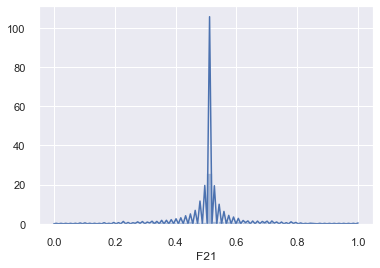

In [611]:
sns.distplot(df_data['F21']) #distribution of data using distplot
plt.show()

In [612]:
df_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.436517,0.529000,0.469995,0.221307,0.781380,0.481000,0.798117,0.795661,0.875883,0.638754,...,0.220434,0.787146,0.933322,0.205540,0.549648,0.083235,0.630384,0.507000,0.447988,0.508185
std,0.082258,0.499408,0.069095,0.204498,0.173477,0.499889,0.191714,0.192715,0.125776,0.060723,...,0.201248,0.201070,0.029887,0.197979,0.139382,0.115493,0.084118,0.500201,0.082841,0.110351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403619,0.000000,0.451688,0.061854,0.674075,0.000000,0.716129,0.710316,0.841642,0.634642,...,0.065835,0.698862,0.933841,0.056862,0.461489,0.007508,0.621178,0.000000,0.413039,0.511564
50%,0.420327,1.000000,0.468515,0.155301,0.819185,0.000000,0.859052,0.852235,0.913428,0.652451,...,0.158303,0.850439,0.934183,0.143730,0.550747,0.040151,0.647137,1.000000,0.427081,0.511747
75%,0.447440,1.000000,0.488101,0.331060,0.918905,1.000000,0.939864,0.939925,0.960996,0.662288,...,0.312398,0.936684,0.934517,0.286469,0.637608,0.109922,0.662837,1.000000,0.456949,0.511931
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [613]:
test_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.485448,0.50000,0.563785,0.219512,0.758868,0.515000,0.799753,0.791540,0.854394,0.613052,...,0.207139,0.793932,0.480030,0.207150,0.516006,0.077052,0.520436,0.511000,0.301614,0.398886
std,0.065512,0.50025,0.080986,0.202408,0.185102,0.500025,0.185311,0.194025,0.145224,0.086227,...,0.190693,0.198661,0.035851,0.196033,0.157056,0.113619,0.081049,0.500129,0.081295,0.101357
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.460925,0.00000,0.539732,0.063681,0.647143,0.000000,0.720820,0.688191,0.800756,0.602588,...,0.061266,0.718807,0.476224,0.060090,0.409292,0.007905,0.509626,0.000000,0.270317,0.397279
50%,0.474440,0.50000,0.562803,0.153608,0.803323,1.000000,0.855312,0.853446,0.901241,0.634756,...,0.150011,0.856364,0.478331,0.140419,0.513643,0.034379,0.536184,1.000000,0.283775,0.397279
75%,0.497850,1.00000,0.584663,0.310210,0.909383,1.000000,0.937929,0.937229,0.957885,0.650108,...,0.302700,0.940945,0.480290,0.304472,0.624413,0.100180,0.551586,1.000000,0.308191,0.397279
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [614]:
df_data.nunique()

F1     974
F2       2
F3     980
F4     942
F5     943
F6       2
F7     948
F8     936
F9     947
F10    983
F11    979
F12    955
F13    946
F14    985
F15    951
F16    982
F17    973
F18    973
F19      2
F20    976
F21    295
dtype: int64

In [615]:
test_data.nunique()

F1     979
F2       2
F3     975
F4     961
F5     941
F6       2
F7     955
F8     950
F9     946
F10    978
F11    977
F12    930
F13    950
F14    977
F15    952
F16    974
F17    976
F18    972
F19      2
F20    980
F21    278
dtype: int64

In [616]:
df_data.duplicated().sum()

0

In [617]:
test_data.duplicated().sum()

0

## Feature Selection

The below heat map shows the corelation of different columns with eachother. A heatmap often helps to view the corelation as seen above. Looking at the above heatmap we can conclude that which attributes or columns are corelated and and can be removed to get a better shaped dataset.

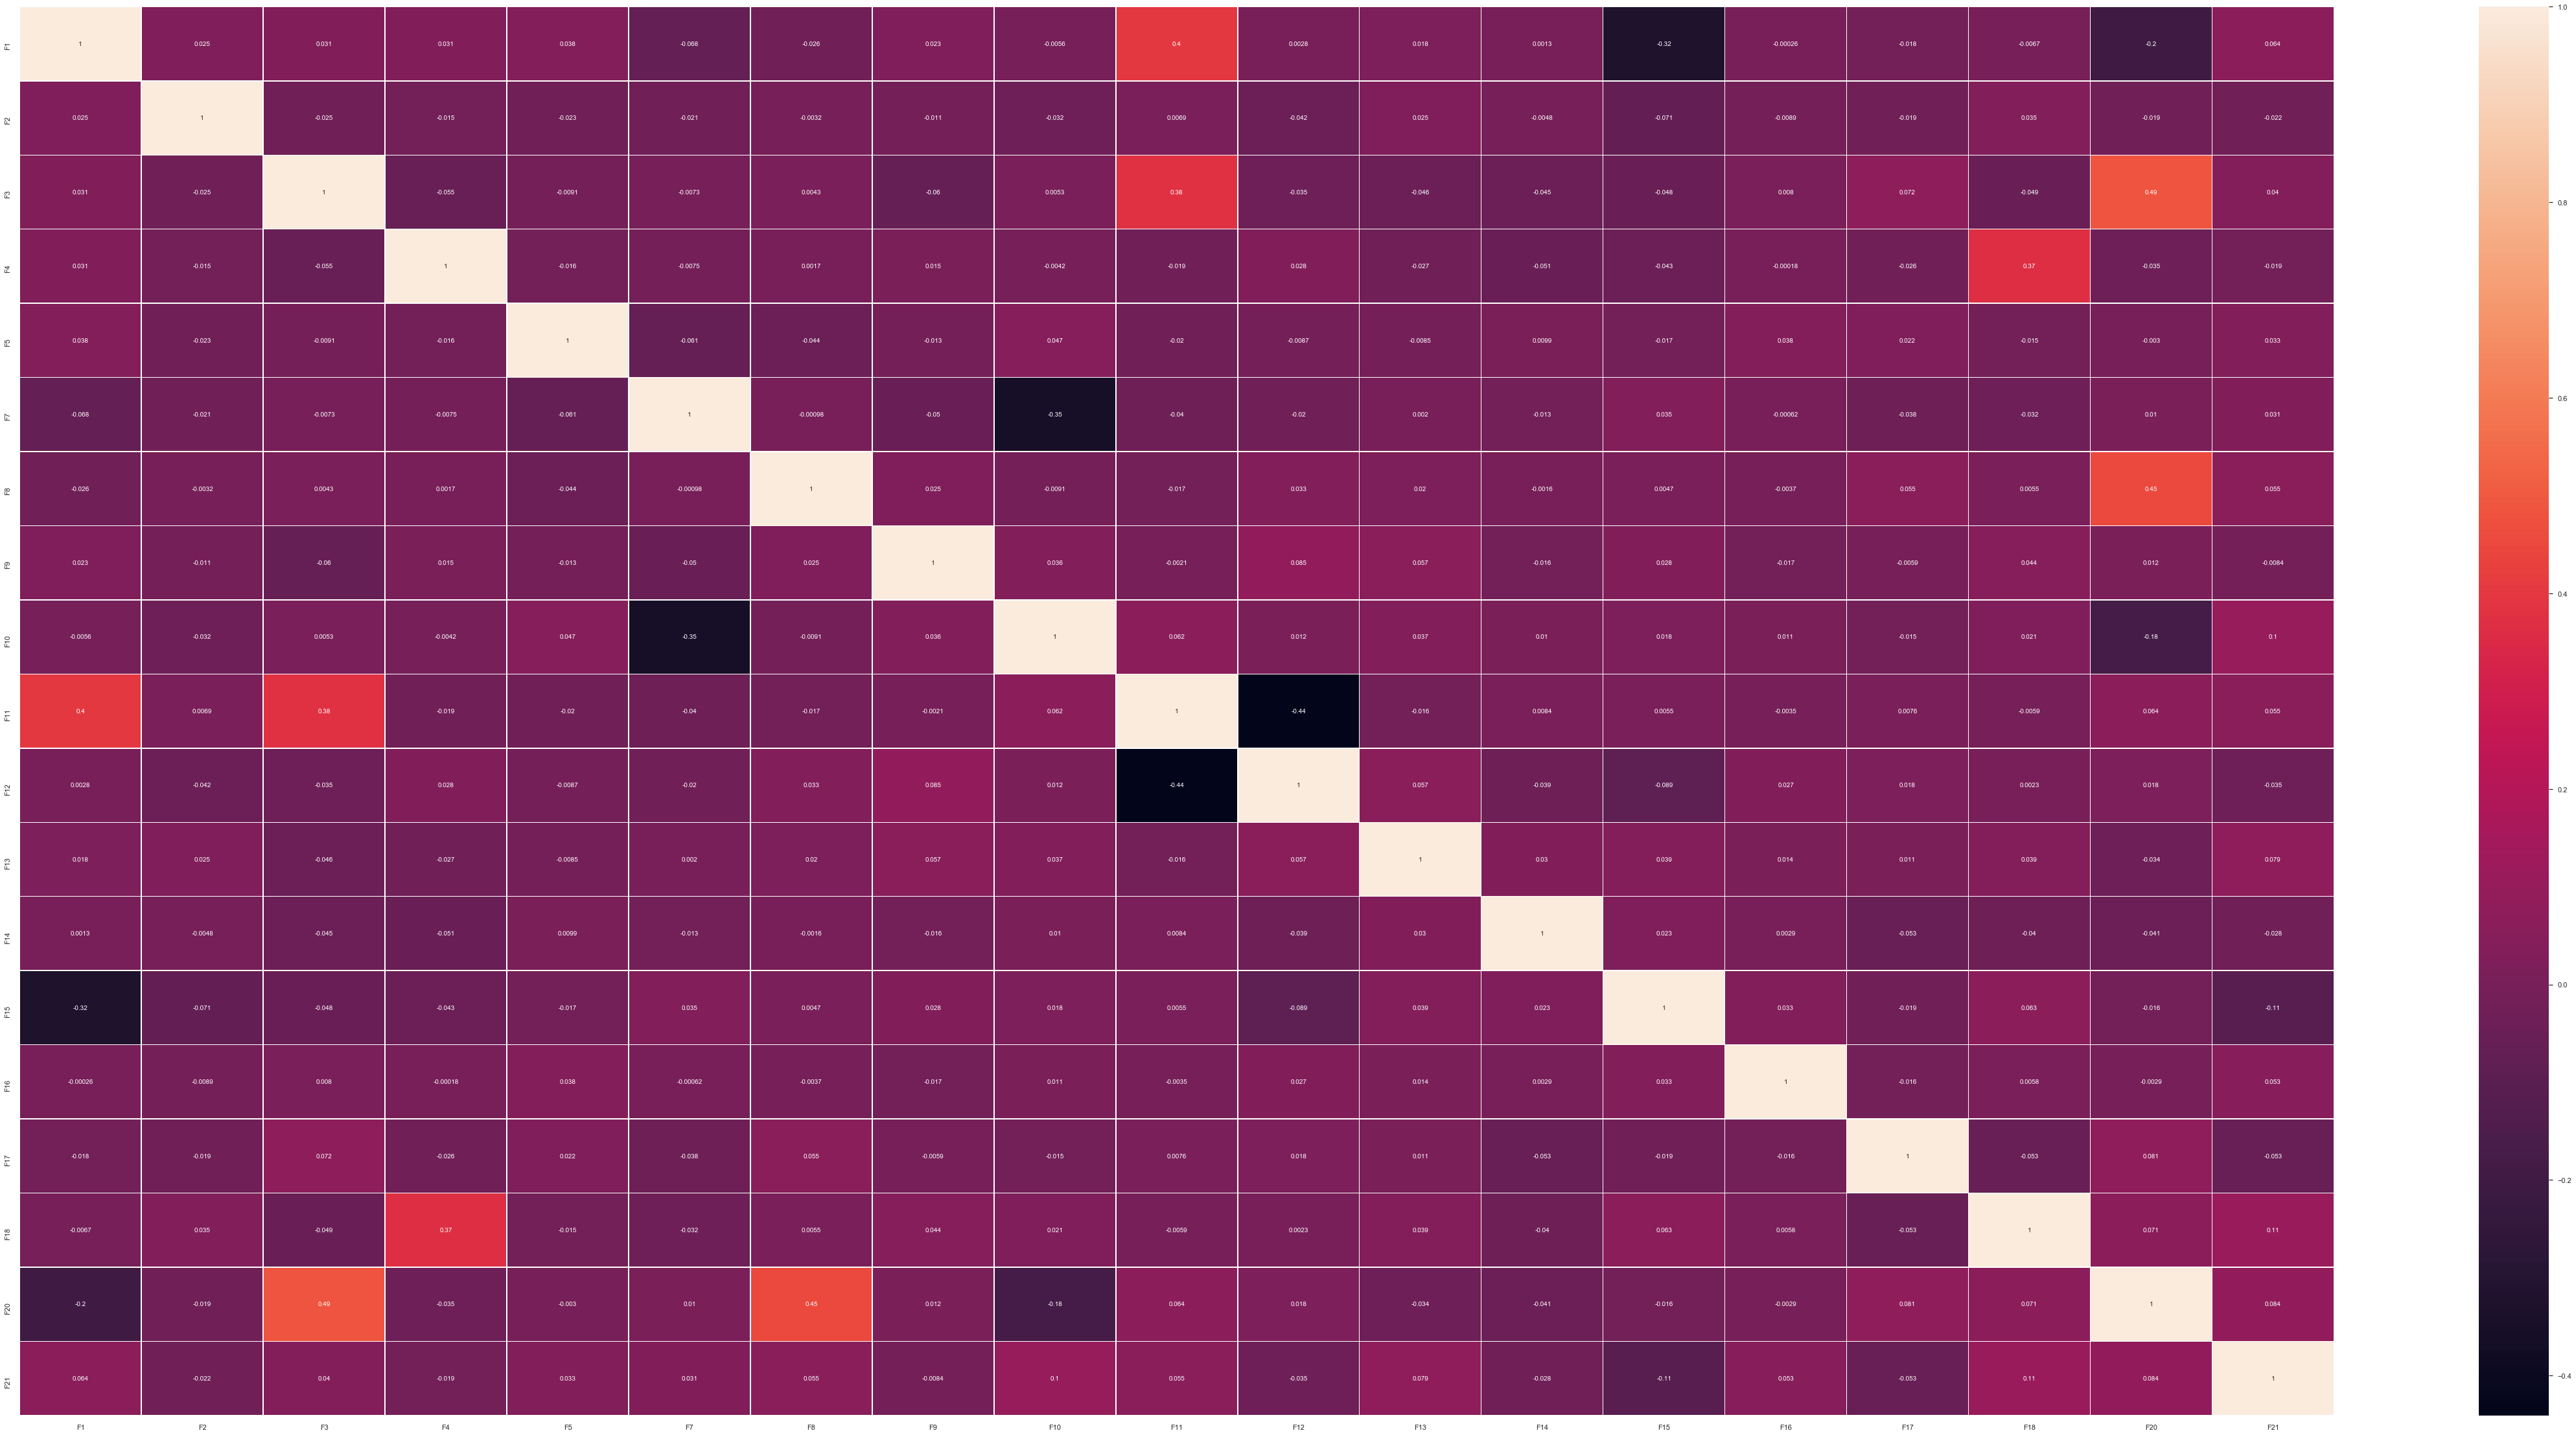

In [739]:
fig, ax = plt.subplots(figsize=(80,40))         # Sample figsize in inches
correlation = df_data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, linewidths=.5, annot=True, ax=ax)

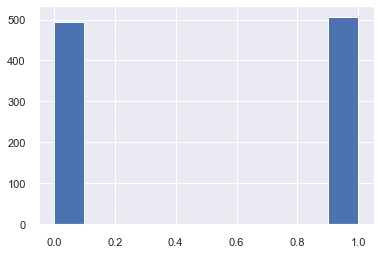

In [620]:
df_data["F19"].hist()  #looking for the pattern in random columns

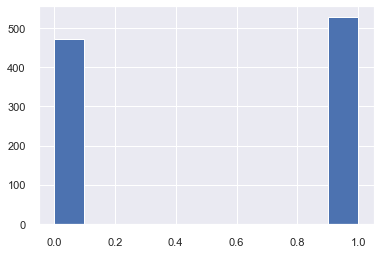

In [621]:
df_data["F2"].hist() #looking for the pattern in random columns

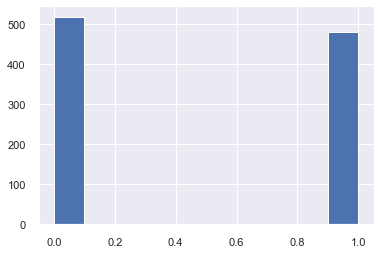

In [622]:
df_data["F6"].hist() #looking for the pattern in random columns

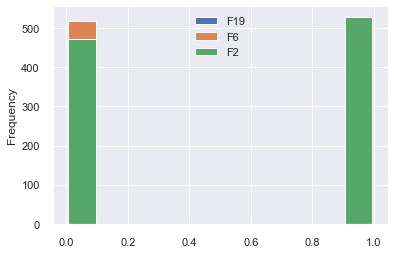

In [623]:
#looking for the pattern in random columns to get better understing of data points distribution

df_data[["F19", "F6", "F2"]].plot.hist(grid=True, rwidth=0.9)

plt.grid(axis='x', alpha=0.95)
plt.legend(loc='upper center')
plt.show()

In [624]:
df_data[["F19", "F6", "F2"]].duplicated().sum()

992

In [625]:
drop_features = ["F19", "F6"]   #values are same so dropping features

In [626]:
df_data = df_data.drop(columns= drop_features)
test_data = test_data.drop(columns= drop_features)

In [627]:
df_data.head(2)

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F20,F21
0,0.430263,0.0,0.458509,0.178002,0.688904,0.879999,0.534482,0.610313,0.659345,0.568617,0.018855,0.757940,0.934917,0.268235,0.794811,0.005320,0.623171,0.406715,0.478708
1,0.397952,1.0,0.463093,0.101399,0.766381,0.510141,0.102376,0.657881,0.660983,0.473931,0.130338,0.630318,0.934755,0.062678,0.571660,0.000938,0.661135,0.414968,0.480176


## Ways to Detect and Remove the Outliers

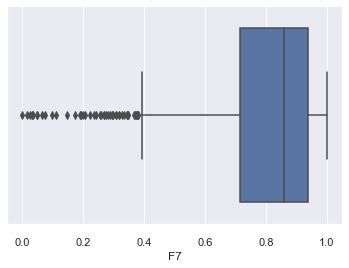

In [628]:
sns.boxplot(df_data["F7"]) 

In [629]:
Q1 = df_data.quantile(0.25)
Q3 = df_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

F1     0.043821
F2     1.000000
F3     0.036413
F4     0.269206
F5     0.244831
F7     0.223734
F8     0.229609
F9     0.119354
F10    0.027646
F11    0.031067
F12    0.246563
F13    0.237822
F14    0.000675
F15    0.229607
F16    0.176118
F17    0.102413
F18    0.041659
F20    0.043910
F21    0.000367
dtype: float64


* Flooring and Capping on the basis of Quantile

In [630]:
for i in range(1, 22):
    if "F" + str(i) in df_data.columns:
        flooring = df_data["F" + str(i)].quantile(0.10)
        capping = df_data["F" + str(i)].quantile(0.90)
        df_data["F" + str(i)] = np.where(df_data["F" + str(i)] <flooring, flooring,df_data["F" + str(i)])
        df_data["F" + str(i)] = np.where(df_data["F" + str(i)] >capping, capping,df_data["F" + str(i)])
        print(df_data["F" + str(i)].skew())

0.9609426133472346
-0.11637023378466657
-0.1588406120606657
0.6549036818584002
-0.43238265288894256
-0.7703299229561444
-0.6859189164667464
-0.7983732224537232
-1.0554118984400738
1.0381892783308282
0.6524763060137964
-0.7454144977831638
-0.1371343858992208
0.7145549519901072
-0.03161092454169097
1.0258748403345221
-1.0748734542492702
1.1384745106528988
-0.21185011944779658


In [631]:
for i in range(1, 22):
    if "F" + str(i) in test_data.columns:
        flooring = test_data["F" + str(i)].quantile(0.10)
        capping = test_data["F" + str(i)].quantile(0.90)
        test_data["F" + str(i)] = np.where(test_data["F" + str(i)] <flooring, flooring,test_data["F" + str(i)])
        test_data["F" + str(i)] = np.where(test_data["F" + str(i)] >capping, capping,test_data["F" + str(i)])
        print(test_data["F" + str(i)].skew())

0.7263331833491848
0.0
0.042260288599795144
0.7436774261660081
-0.38855880961068673
-0.7244160308985778
-0.640241320395113
-0.7858867124495577
-0.9525269120607199
0.6900924401064376
0.6875858807982984
-0.7805438111272985
0.16467198731215807
0.7802214110166253
-0.020384003990030264
1.0639347834073634
-0.8564774331084073
0.9628062067391421
0.15381548378335025


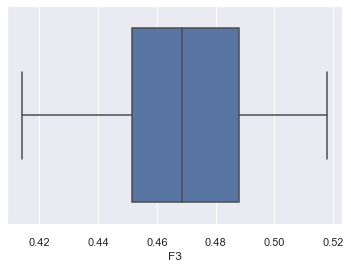

In [632]:
sns.boxplot(df_data["F3"]) 

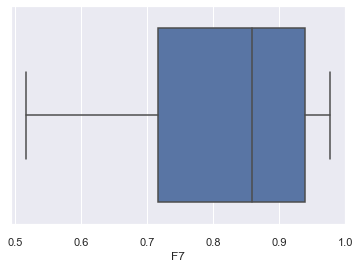

In [633]:
sns.boxplot(df_data["F7"])

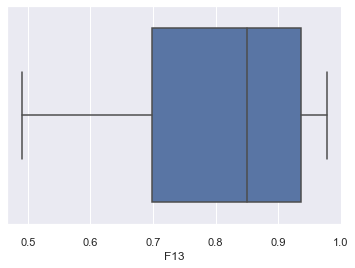

In [634]:
sns.boxplot(df_data["F13"])

# Training Model, Predicting & Testing Predictors

In [635]:
#!pip install lightgbm

In [636]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import tree 

In [637]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [638]:
accuracies = {}

In [639]:
X = df_data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

## 1. RandomForest Classifier

In [640]:
clf_random_forest = RandomForestClassifier(n_estimators=100)
clf_random_forest.fit(X_train,y_train)
y_predr_RF = clf.predict(X_test)

In [641]:
accuracy = metrics.accuracy_score(y_test, y_predr_RF)

print("Accuracy of Random forest Algorithm: {:.2f}%".format(accuracy))

Accuracy of Random forest Algorithm: 0.86%


In [643]:
accuracies['Random Forest'] = accuracy

In [647]:
accuracies

{'Random Forest': 0.856, 'Decision Tree': 0.88}

## 2. Decision Tree Classifier with and without K-folds

In [663]:
dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dtree.fit(X_train,y_train)
y_pred_DT_entropy = dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_DT_entropy))

Accuracy: 0.88


In [646]:
accuracies['Decision Tree'] = metrics.accuracy_score(y_test, y_pred_DT_entropy)

In [677]:
y_pred_DT_entropy

array([False, False,  True,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True, False, False,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
        True,  True, False, False, False,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

#testing k folds for decition tree

In [669]:
#Import decision tree classification model and cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
 
#Extract a holdout set at the very begining
X_train_set, X_holdout, y_train_set, y_holdout = train_test_split(X, y, 
                                stratify = y, random_state = 42, test_size = .25)
 
#Get input and output datasets values in X and Y variables
X1 = X_train_set
y1 = y_train_set 
 
#Initialize k-fold cross validation configurations
kf = KFold(n_splits=5, random_state=42)
 
scores1 = []
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth = 3, \
                        min_samples_leaf = 0.10, random_state = 42)
scores1 = cross_val_score(dt1, X, y, cv = 10)

print("The cross-validation scores using cross_val_score method are \n{0}".format(scores1))


print("Mean of k-fold scores using cross_val_score method is {0}".format(np.mean(scores1)))

print("\n")

The cross-validation scores using cross_val_score method are 
[0.83 0.74 0.86 0.8  0.7  0.81 0.71 0.84 0.86 0.76]
Mean of k-fold scores using cross_val_score method is 0.7909999999999999




In [670]:
dt1.fit(X_train_set,y_train_set)
y_pred_DT_entropy1 = dtree.predict(X_holdout)
print("Accuracy:", metrics.accuracy_score(y_holdout, y_pred_DT_entropy1))

Accuracy: 0.832


## 3. Support Vector Machine [SVM]

In [672]:
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
y_pred_svm = SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)

0.78

In [684]:
accuracies['SVM'] = metrics.accuracy_score(y_test, y_pred_svm)

In [676]:
y_pred_svm

array([False, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
       False,  True,  True, False, False,  True, False, False,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
       False,  True,

## 4. LogisticRegression

In [678]:
clf_lreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_pred_clf_lreg = clf_lreg.predict(X_test)
round(clf_lreg.score(X_test,y_test), 4)

0.796

In [685]:
accuracies['Logistic Regression'] = round(clf_lreg.score(X_test,y_test), 4)

In [680]:
y_pred_clf_lreg

array([False, False, False,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,

## 5. KNeighborsClassifier

In [681]:
knn=KNeighborsClassifier(n_neighbors=4,metric='euclidean',p=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=5,
                     weights='uniform')

In [682]:
y_pred_knn=knn.predict(X_test)


In [683]:
knn.score(X_test,y_test)

0.576

In [686]:
accuracies['Knn'] = round(knn.score(X_test,y_test))

In [689]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [693]:
accuracies

{'Random Forest': 0.856,
 'Decision Tree': 0.88,
 'SVM': 0.78,
 'Logistic Regression': 0.796,
 'Knn': 1.0}

## 6. LGBM Classifier

In [695]:
clf_lgb = lgb.LGBMClassifier()
clf_lgb.fit(X_train, y_train)
clf_lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [696]:
y_pred_lgbm = clf_lgb.predict(X_test)

In [697]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_lgbm, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_lgbm)))

LightGBM Model accuracy score: 0.8680


In [698]:
y_pred_train_lgb = clf_lgb.predict(X_train)

In [699]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_lgb)))

Training-set accuracy score: 1.0000


In [700]:
accuracies['LGBM'] = round(accuracy_score(y_train, y_pred_train_lgb))

**Model Accuracy**

In [701]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8680


## Decision tree confusion matrix + classification report

**Confusion-matrix**

In [703]:

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_DT_entropy)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[105  13]
 [ 17 115]]

True Positives(TP) =  105

True Negatives(TN) =  115

False Positives(FP) =  13

False Negatives(FN) =  17


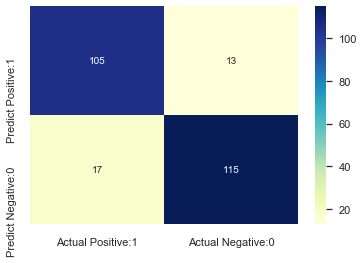

In [704]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Classification Report**

In [705]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_DT_entropy))

              precision    recall  f1-score   support

       False       0.86      0.89      0.88       118
        True       0.90      0.87      0.88       132

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



**Hyperparameter Tunning for LBGM algorithm**

In [706]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV
params = {
 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
 'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
 'importance_type': ['split', 'gain'],
 'learning_rate': [0.1, 0.01, 0.05,0.001, 0.005],
 'min_child_samples': sp_randint(5, 500),
 'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3, 1e4],
 'n_estimators': sp_randint(1, 200),
 'num_leaves': sp_randint(1, 200),
 'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
 'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
 'silent': [True, False],
 'subsample': sp_uniform(loc=0.2, scale=0.8),
}

In [707]:
clf_cv = RandomizedSearchCV(clf_lgb, params, cv=5)
clf_cv.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 299, number of negative: 301
[LightGBM] [Info] Number of positive: 299, number of negative: 301
[LightGBM] [Info] Number of positive: 299, number of negative: 301
[LightGBM] [Info] Number of positive: 299, number of negative: 301
[LightGBM] [Info] Number of positive: 300, number of negative: 300
[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Info] Number of positive: 299, number of negative: 301
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 0
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498333 -> initscore=-0.006667
[LightGBM] [Info] Start training from score -0.006667
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [War

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029F4EC19A

In [708]:
clf_cv.best_params_

{'boosting_type': 'dart',
 'colsample_bytree': 0.47786446583529807,
 'importance_type': 'split',
 'learning_rate': 0.05,
 'min_child_samples': 60,
 'min_child_weight': 0.001,
 'n_estimators': 176,
 'num_leaves': 182,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'silent': True,
 'subsample': 0.9430238633336383}

In [709]:
clf_cv.best_score_

0.7533333333333333

In [277]:
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

## K Means Clustering

***k means algorith implementation for classification***

****We use the k-means elbow method and the Silhouette Method to achieve how many clusters we should use for our analysis.****

Elbow Method
K-Means is a simple unsupervised machine learning algorithm that groups data into the number  K  of clusters specified by the user, even if it is not the optimal number of clusters for the dataset.

Yellowbrick's KElbowVisualizer implements the “elbow” method of selecting the optimal number of clusters by fitting the K-Means model with a range of values for  K . If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

In the following example, the KElbowVisualizer fits the model for a range of  K  values from 1 to 11, which is set by the parameter k=(1,12). When the model is fit with 2 clusters we can see an "elbow" in the graph, which in this case we know to be the optimal number since we created our synthetic dataset with 12 clusters of points.

By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer—silhouette and calinski_harabaz

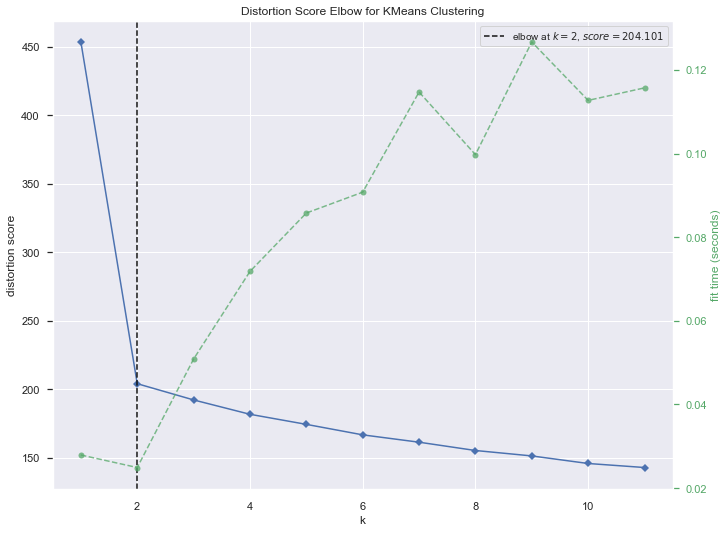

In [710]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), size=(800, 620)).fit(df_data)
visualizer.show()

In [711]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df_data)

In [714]:
kmeans.labels_

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,

In [715]:
kmeans.inertia_

204.1008297819597

In [716]:
kmeans.n_iter_

2

In [717]:
kmeans.cluster_centers_

array([[4.30098611e-01, 2.22044605e-15, 4.69539676e-01, 2.08869661e-01,
        7.96178981e-01, 8.16239640e-01, 8.12443159e-01, 8.89290824e-01,
        6.45665775e-01, 5.00960500e-01, 2.11654680e-01, 7.98708382e-01,
        9.34168924e-01, 1.99433972e-01, 5.50724176e-01, 7.13119437e-02,
        6.34460422e-01, 4.42187903e-01, 5.09537616e-01],
       [4.32200058e-01, 1.00000000e+00, 4.68066892e-01, 2.03781828e-01,
        7.89452575e-01, 8.09895031e-01, 8.11496409e-01, 8.87389146e-01,
        6.44020729e-01, 5.01385218e-01, 1.98106731e-01, 8.06706224e-01,
        9.34163286e-01, 1.77978511e-01, 5.48738551e-01, 6.84002640e-02,
        6.37204826e-01, 4.40568769e-01, 5.06347832e-01]])

In [718]:
kmeans.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)>

## TakeAway -- K means clustering
Clustering apart from being an unsupervised machine learning can also be used to create clusters as features to improve classification models. On their own they aren’t enough for classification as the results show. But when used as features they improve model accuracy.

# Prediction on test data using Decision Tree

In [723]:
test_data.head(2)

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F20,F21
0,0.443384,1.0,0.586530,0.419569,0.961831,0.975403,0.888647,0.843789,0.664344,0.587877,0.034285,0.825671,0.477498,0.025591,0.314048,0.070760,0.550625,0.338729,0.397279
1,0.524980,0.0,0.554938,0.044421,0.936611,0.955159,0.535072,0.951501,0.542267,0.598425,0.169789,0.736409,0.478026,0.084626,0.439639,0.037531,0.459755,0.268649,0.397279


In [727]:
test_data_prediction = dtree.predict(test_data).tolist()

### Part B

In [730]:
# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

predicted = test_data_prediction 

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])